<a href="https://colab.research.google.com/github/AntonioSanabria26/Proyectos/blob/main/03_Codigo_Final_3_Particulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduce el número de particulas: 3


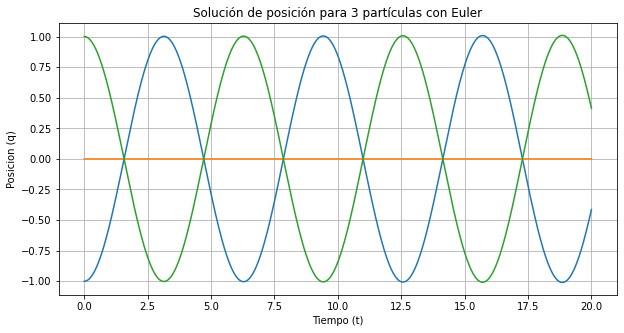

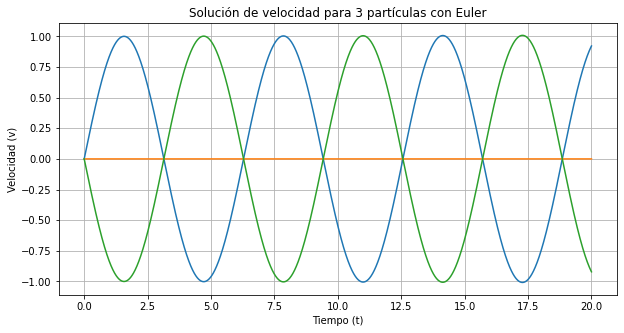

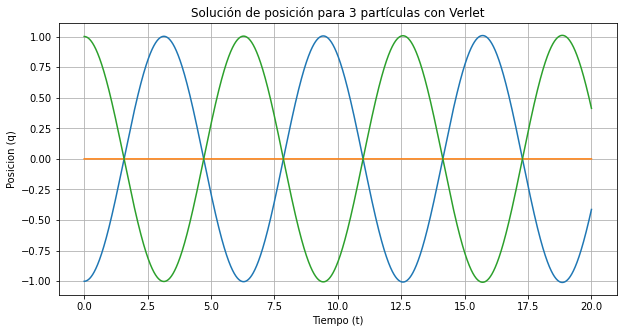

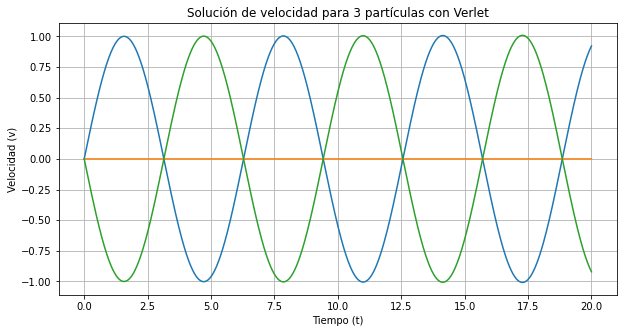




Elapsed time: 4.5001854897 seconds.




In [33]:
#------------------------ CÓDIGO PARA N PARTICULAS ----------------------------#

import numpy as np
import matplotlib.pyplot as plt
import itertools
from time import time

%matplotlib inline

#------------------------------------------------------------------------------#

N = int(input("Introduce el número de particulas: "))
#N = 3

#------------------------------------------------------------------------------#


#CONTADOR DE TIEMPO
start_time = time() 


#------------------------- FUNCION PARA FUERZAS -------------------------------#

def f(N,q):

  F = np.zeros(N)
  F[0] =  (q[1] - q[0])
  F[N-1] = -(q[N-1] - q[N-2])

  for i in range(1,N-1):
      F[i] = (q[i+1] - 2*q[i] + q[i-1])

  return F

#------------------------- CONDICIONES INICIALES ------------------------------#

# ------------------------ CONDICIONES INICIALES ----------------------------- #
t0 = 0                          # Tiempo inicial
tf = 20                         # Tiempo final
h = 0.001                       # Paso en el tiempo
hd2 = h/2
hp2 = h*h

q0 = [-1,0,1]

#q0 = [] 
#for i in range(N):              #
#  if i % 2 :                    #
#   q0.append (0.5)              # Posicion inicial en X
#  else:                         #  
#   q0.append(-0.5)              #  


v0 = np.zeros(N)                # Velocidad inicial


t = np.arange(t0,tf,h)          # Arreglo de tiempo


m = []
for i in range(N):              # Masa para N particulas
   m.append (1)              # Posicion inicial en X



#---------------------------- MÉTODO DE EULER ---------------------------------# 

q = [q0]
v = [v0]
T = [t0]

for j in range(len(t)-1):  # Loop en tiempo

      # Se evalua la fuerza sobre cada partícula
      f0 = f(N,q0) 

      # Se hacen evolucionar las variables
      q1 = q0 + v0*h          
      v1 = v0 + f0*h         

      # Se almacena la información
      q = np.vstack([q,q1]) 
      v = np.vstack([v,v1])

      # Se reinician las variables
      q0 = q1
      v0 = v1
#------------------------------------------------------------------------------#

#PLOTEO DE POSICION CON EULER
plt.figure(figsize=(10,5))
plt.title('Solución de posición para ' f'{N}' ' partículas con Euler')
plt.grid()
plt.xlabel('Tiempo (t)')
plt.ylabel('Posicion (q)')
for j in range(N): 
  plt.plot(t,q[:,j])
plt.show()
print()
#PLOTEO DE VELOCIDAD CON EULER
plt.figure(figsize=(10,5))
plt.title('Solución de velocidad para ' f'{N}' ' partículas con Euler')
plt.grid()
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad (v)')
for j in range(N): 
  plt.plot(t,v[:,j])
plt.show()
print()

#---------------------------- MÉTODO DE VERLET---------------------------------# 

T = [t0]
Q = [q0]
V = [v0]

while t0<tf:
  # Avanza el tiempo
  t1 = t0+h
  T.append(t1)
 
  # Evolucionan las posiciones
  q1 = q0 + v0*h + 0.5*(f0/m)*hp2
 
  # Se evalúan las fuerzas actuales
  f1 = f(N,q1) 
 
  # Evolucionan las velocidades
  v1 = v0+(f1+f0)*hd2/m

  # Se almacena la información
  Q = np.vstack([Q,q1])
  V = np.vstack([V,v1])
 
  # Se reinicia la información
  t0 = t1
  q0 = q1
  v0 = v1
  f0 = f1
#------------------------------------------------------------------------------#
#PLOTEO DE POSICION CON VERLET
plt.figure(figsize=(10,5))
plt.title('Solución de posición para ' f'{N}'' partículas con Verlet')
plt.grid()
plt.xlabel('Tiempo (t)')
plt.ylabel('Posicion (q)')
for j in range(N): 
    plt.plot(t,q[:,j])
plt.show()
print()
#PLOTEO DE VELOCIDAD CON VERLET

plt.figure(figsize=(10,5))
plt.title('Solución de velocidad para ' f'{N}'' partículas con Verlet')
plt.grid()
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad (v)')
for j in range(N): 
    plt.plot(t,v[:,j])
plt.show()
print()

#------------------------ CONTADOR DE TIEMPO ----------------------------------#

print()
print()

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

print()
print()

#------------------------------------------------------------------------------#